Francisco Hernandez Alejandre

Octavio Guerrero

# Partial Differential Equation Training

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 1 Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model for PDEs. Here it is:
$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0$.
c is a velocity, whereas u can be any advected quantity. For example it can be the concentration of some polutant in a river flowing at speed c.


With given initial conditions (understood as a wave), the equation represents the propagation of that initial wave with speed c along the X axis
, without change of shape. Let the initial condition be $u(x,0)=u_0 (x)$
. Then the exact solution of the equation is $u(x,t)=u_0(x−ct)$
(See lecture this morning).


We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate x  into points that we index from $i=0$ to $N$ , and stepping in discrete time intervals of size $dt$.




We use the following convention : $U^{n}_i$ is the amplitude of the wave at time $t=n \times dt$, and at $x=i \times dx$

How woud you approximate $\frac{\partial u}{\partial t}$ , using $U^{n}_i$, with a forward difference sheme ?

$\frac{\partial u}{\partial t}= \frac{U^{n+1}_i-U^{n}_i}{dt}$

How woud you approximate $\frac{\partial u}{\partial x}$ , using $U^{n}_i$, with a backward difference sheme ?


$\frac{\partial u}{\partial x}= \frac{U^{}_i-U^{n}_{i-1}}{dx}$

Write the first order explicit integration scheme we will use, in function of $U^{n}_i$, c, dt, dx, $U^{n}_i$ and $U^{n}_{i-1}$

$U^{n+1}_i =U^{n}_i -(\frac{cdt}{dx})(U^{n}_i-U^{n}_{i-1}) $ 

Now let's try implementing this in Python.

We want to define an evenly spaced grid of points within a  domain that is 2 units of length wide, i.e., 0<x_i<2. Vafiable $nx$ which will be the number of grid points we want and dx will be the distance between two adjacent grid points. we define the following values 

In [2]:
nx = 41  # This will be changed latter
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
c = 1      #assume advection velocity  is c = 1

We also need to set up our initial conditions. The initial concentration u0
 is given as  u=2 in the interval 0.5≤x≤1 and u=1
 everywhere else in (0,2)  (i.e., a hat function). Build U

In [3]:
def U_function(x):
    if x>=0.5 and x<=1:
        return 2
    else:
        return 1
    

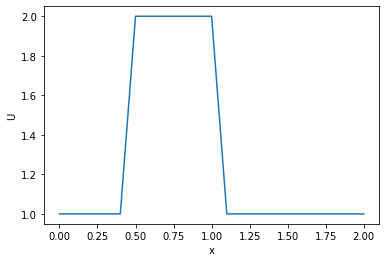

In [4]:
#plot, U, your initial concentration profile.
points = np.arange(0,2+0.1,0.1)
plt.plot(points, np.array([U_function(i) for i in points]))
plt.xlabel("x")
plt.ylabel("U")
plt.show()


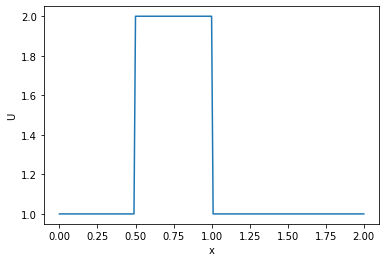

In [5]:
#plot, U, your initial concentration profile.
points = np.arange(0,2+0.01,0.01)
plt.plot(points, np.array([U_function(i) for i in points]))
plt.xlabel("x")
plt.ylabel("U")
plt.show()


Why doesn't the hat function have perfectly straight sides? Think for a bit.

In [6]:
#From the graphics above one can notice that the lines get more straight when we introduce smaller steps in x axis. So, for larger x steps one can
#say that the function is not taking a good approximation and has missing points that prevent the solution to be exact

Now we miplement the discretization of the convection equation using a finite-difference scheme. For every element i of our array $U^{n}_i$ we need to perform the operation define above ($U^{n+1}_i$).  We'll store the result in a new (temporary) array Un, which will be the next state of U  for the next time-step. We will repeat this operation for as many time-steps as we specify and then we can see how far the concentration profile has convected.

We will need also boundary conditions, so for the moment we will only use periodic boundary conditions (what leaves from the right, re-enters at the left)

 The code's structure is the following :
 
 1) define U at time =0, dt, dx, c etc...
 
 2) compute Un as a function of U and all other information.
 
 3) Take care of boundary conditions at the edges 
 
 4) Time=Time+dt
 
 5) go back to 2
 

Boundary conditions: Explain how you compute $U^{n}_0$ and $U^{N}_i$ ?

In [7]:
#The first case is given by the boundary conditions at t=0, so it's given by the problem itself
#For the second, we get it from known elements of the array. In the first step it takes the form of U_0

Write the code...

In [8]:
def U_n(interval, dx, dt,nt,nx,c):
    #Our initial values are given by an array of the initial conditions over the interval, so we have a start point to calculate the periodic boundary conditions
    points = np.linspace(interval[0],interval[1],nx)
    values_matrix = np.ones((nt,nx))
    values_matrix[0,:] = np.array([U_function(i) for i in points])
    #First we run over the time, and then we calculate the spacial values running a for loop over the number of spacial steps 
    for i in range(nt-1):
        for j in range(1,nx-1):
            values_matrix[i+1,j] = values_matrix[i,j] - (c*dt/dx)*(values_matrix[i,j] - values_matrix[i,j-1])
    return {'values':values_matrix, 'x_points':points}



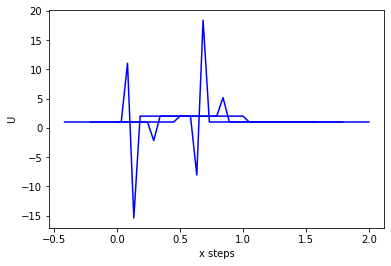

In [9]:
#PLot U at different times: 3 time steps, 12 time steps, 25 time steps

# 3 time steps
nt = 3  #nt is the number of timesteps we want to calculate
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
results_3 = U_n([0,2],dx, dt,nt,nx,c)

#Let's graph at every time step to see the evolution of the matrix
for item in range(len(results_3['values'])):
    plt.plot(results_3['x_points']-item*dt, results_3['values'][item], 'b') #We substract item*dt on every step to center all graphs

plt.xlabel('x steps')
plt.ylabel('U')
plt.show()


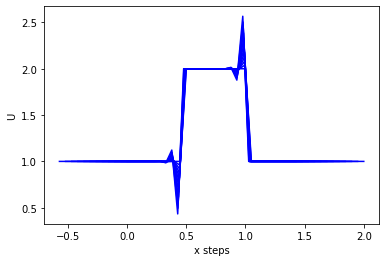

In [10]:
# 12 time steps
nt = 12  #nt is the number of timesteps we want to calculate
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
results_12 = U_n([0,2],dx, dt,nt,nx,c)

#Let's graph at every time step to see the evolution of the matrix
for item in range(len(results_12['values'])):
    plt.plot(results_12['x_points']-item*dt, results_12['values'][item], 'b')

plt.xlabel('x steps')
plt.ylabel('U')
plt.show()

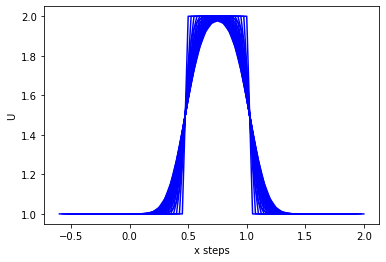

In [11]:
# 25 time steps
nt = 25  #nt is the number of timesteps we want to calculate
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
results_25 = U_n([0,2],dx, dt,nt,nx,c)

#Let's graph at every time step to see the evolution of the matrix

for item in range(len(results_25['values'])):
    plt.plot(results_25['x_points']-item*dt, results_25['values'][item], 'b')

plt.xlabel('x steps')
plt.ylabel('U')
plt.show()

In [12]:
#What do you notice ? comment on what you see

In [13]:
#We notice that the convergence to a "Gaussian" form improves when increasing time steps. This is because we're increasing the number of points to evaluate.

#Just like when studying ODE, the number of steps determine the precision of our calculation. 

What is the value of CFL=dt C / dx ? 

In [14]:
CFL = dt * c/dx
print("CFL=",CFL)

CFL= 0.5


Redo the same computation, vayring dt , for CFL>1. and CFL << 1

In [15]:
nt = 10  #nt is the number of timesteps we want to calculate
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
CFL = dt * c/dx
print("For nt= 10, CFL=",CFL)
nt = 100  #nt is the number of timesteps we want to calculate
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
CFL = dt * c/dx
print("For nt= 100, CFL=",CFL)

For nt= 10, CFL= 1.25
For nt= 100, CFL= 0.125


In [16]:
#What do you notice ? What is the the good integration conditions ?

In [17]:
#We notice that for CFL << 1 the results are more stable. This is because we need short time steps to have better transmission of length dx. 

In [18]:
#Now redo the computation, with CFL>1 and using an initial U that is gaussian.

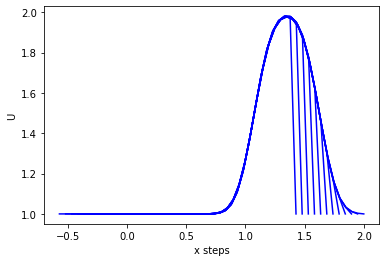

In [33]:
#Let's take 
u_0 = results_25['values'][24] #This is gaussian as we noticed on the graphics above
nt = 12  #nt fot CFL > 1
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
def U_n_gaussian_init(interval, dx, dt,nt,nx,c,u_0):
    #Our initial values are given by an array of the initial conditions over the interval, so we have a start point to calculate the periodic boundary conditions
    points = np.linspace(interval[0],interval[1],nx)
    values_matrix = np.ones((nt,nx))
    values_matrix[0,:] = np.array(u_0)
    #First we run over the time, and then we calculate the spacial values running a for loop over the number of spacial steps 
    for i in range(nt-1):
        for j in range(1,nx-1):
            values_matrix[i+1,j] = values_matrix[i,j] - (c*dt/dx)*(values_matrix[i,j] - values_matrix[i,j-1])
    return {'values':values_matrix, 'x_points':points}

values_gaussian = U_n_gaussian_init([0,2],dx, dt,nt,nx,c,u_0)

#Let's graph at every time step to see the evolution of the matrix
for item in range(len(values_gaussian['values'])):
    plt.plot(values_gaussian['x_points']-item*dt, values_gaussian['values'][item], 'b')


plt.xlabel('x steps')
plt.ylabel('U')
plt.show()


In [20]:
#What do you notice ?

In [21]:
#We get better results by introducing inicial conditions that match the desired results. Also, we notice that because the Gaussian moves to the right
#our graphs get cropped when they reach the limit of the interva, in this case 2. 

 Redo the same thing using a 2nd order accuracy expression for the space derivative, and 1st order accuracy expression for the time derivative
    like leap frog.

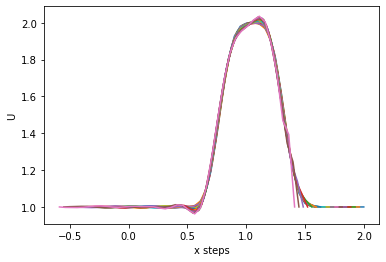

In [48]:
u_0 = results_25['values'][12] #This is gaussian as we noticed on the graphics above
def U_n_second_order(interval,dx, dt,nt,nx,c,u_0):
    #Our initial values are given by an array of the initial conditions over the interval, so we have a start point to calculate the periodic boundary conditions
    points = np.linspace(interval[0],interval[1],nx)
    values_matrix = np.ones((nt,nx))
    #values_matrix[0,:] = np.array([U_function(i) for i in points])
    values_matrix[0,:] = np.array(u_0)
    #First we run over the time, and then we calculate the spacial values running a for loop over the number of spacial steps 
    for i in range(nt-1):
        for j in range(1,nx-1):
            if i == 0:
                values_matrix[i+1,j] = values_matrix[i,j] - (c*dt/dx)*(values_matrix[i,j] - values_matrix[i,j-1])
            else:
                values_matrix[i+1,j] = values_matrix[i-1,j] - (c*dt/dx)*(values_matrix[i,j+1] - values_matrix[i,j-1])
    return {'values':values_matrix, 'x_points':points}

nt = 17  #nt fot CFL > 1
dt = Delta_T/(nt*1.0) #dt is lentgh  of each time step 
results = U_n_second_order([0,2],dx, dt,nt,nx,c, u_0)

for item in range(len(results['values'])):
        plt.plot(results['x_points']-item*dt, results['values'][item])

plt.xlabel('x steps')
plt.ylabel('U')
plt.show()

Comment ?

In [23]:
#The approximation is good, but it starts to act somewhat messy at latest steps because it tries to predict a behaviour outside the interval we're working on. 